# EDA

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from matplotlib.ticker import MultipleLocator
import seaborn as sns

In [2]:
path_train = "../data/input/cleaned_train.csv"
path_test = "../data/input/cleaned_test.csv"

In [3]:
train_df = pd.read_csv(path_train)
test_df = pd.read_csv(path_test)

## 統計量確認

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3489 entries, 0 to 3488
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3489 non-null   int64  
 1   Age                     3389 non-null   float64
 2   TypeofContact           3483 non-null   object 
 3   CityTier                3489 non-null   int64  
 4   DurationOfPitch         3368 non-null   float64
 5   Occupation              3489 non-null   object 
 6   Gender                  3489 non-null   object 
 7   NumberOfPersonVisiting  3489 non-null   float64
 8   NumberOfFollowups       3456 non-null   float64
 9   ProductPitched          3489 non-null   object 
 10  PreferredPropertyStar   3489 non-null   float64
 11  NumberOfTrips           3467 non-null   float64
 12  Passport                3489 non-null   int64  
 13  PitchSatisfactionScore  3489 non-null   int64  
 14  Designation             3489 non-null   

In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3489 entries, 0 to 3488
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3489 non-null   int64  
 1   Age                     3396 non-null   float64
 2   TypeofContact           3477 non-null   object 
 3   CityTier                3489 non-null   int64  
 4   DurationOfPitch         3358 non-null   float64
 5   Occupation              3489 non-null   object 
 6   Gender                  3489 non-null   object 
 7   NumberOfPersonVisiting  3489 non-null   float64
 8   NumberOfFollowups       3465 non-null   float64
 9   ProductPitched          3489 non-null   object 
 10  PreferredPropertyStar   3489 non-null   float64
 11  NumberOfTrips           3447 non-null   float64
 12  Passport                3489 non-null   int64  
 13  PitchSatisfactionScore  3489 non-null   int64  
 14  Designation             3489 non-null   

In [6]:
train_df.describe()

,id,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,MonthlyIncome,ProdTaken
count,3489.000000,3389.000000,3489.000000,3368.000000,3489.000000,3456.000000,3489.000000,3467.000000,3489.000000,3489.000000,3433.000000,3489.000000
mean,1744.000000,39.434937,1.697048,860.682898,2.394669,7.765336,3.441101,3.194693,0.102608,2.513901,355671.369065,0.142448
std,1007.331872,9.904874,0.671500,417.261793,0.726612,39.498670,0.599633,1.732849,0.303490,1.115412,75173.253245,0.349559
min,0.000000,18.000000,1.000000,240.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,200000.000000,0.000000
25%,872.000000,32.000000,1.000000,540.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,300000.000000,0.000000
50%,1744.000000,38.000000,2.000000,780.000000,2.000000,4.000000,3.000000,3.000000,0.000000,2.000000,343140.000000,0.000000
75%,2616.000000,47.000000,2.000000,960.000000,3.000000,4.000000,4.000000,5.000000,0.000000,3.000000,400000.000000,0.000000
max,3488.000000,61.000000,3.000000,2160.000000,4.000000,600.000000,5.000000,8.000000,1.000000,5.000000,600000.000000,1.000000


In [8]:
test_df.describe()

,id,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,MonthlyIncome
count,3489.000000,3396.000000,3489.000000,3358.00000,3489.000000,3465.000000,3489.000000,3447.000000,3489.000000,3489.000000,3440.000000
mean,5233.000000,39.185807,1.682717,875.30673,2.407567,6.849639,3.431929,3.219901,0.095156,2.500143,356591.114826
std,1007.331872,9.938956,0.671710,427.73201,0.741628,34.890230,0.599618,1.737514,0.293473,1.153904,77118.663103
min,3489.000000,18.000000,1.000000,240.00000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,200000.000000
25%,4361.000000,32.000000,1.000000,540.00000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,300000.000000
50%,5233.000000,38.000000,2.000000,780.00000,2.000000,4.000000,3.000000,3.000000,0.000000,2.000000,340627.500000
75%,6105.000000,47.000000,2.000000,1020.00000,3.000000,4.000000,4.000000,5.000000,0.000000,3.000000,400000.000000
max,6977.000000,61.000000,3.000000,2160.00000,4.000000,500.000000,5.000000,8.000000,1.000000,5.000000,600000.000000


大きな偏りは見受けられない

## ヒストグラムからTrainとTestのデータ分布の傾向の違いを確認

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'CityTier'}>],
       [<Axes: title={'center': 'DurationOfPitch'}>,
        <Axes: title={'center': 'NumberOfPersonVisiting'}>,
        <Axes: title={'center': 'NumberOfFollowups'}>],
       [<Axes: title={'center': 'PreferredPropertyStar'}>,
        <Axes: title={'center': 'NumberOfTrips'}>,
        <Axes: title={'center': 'Passport'}>],
       [<Axes: title={'center': 'PitchSatisfactionScore'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'ProdTaken'}>]], dtype=object)

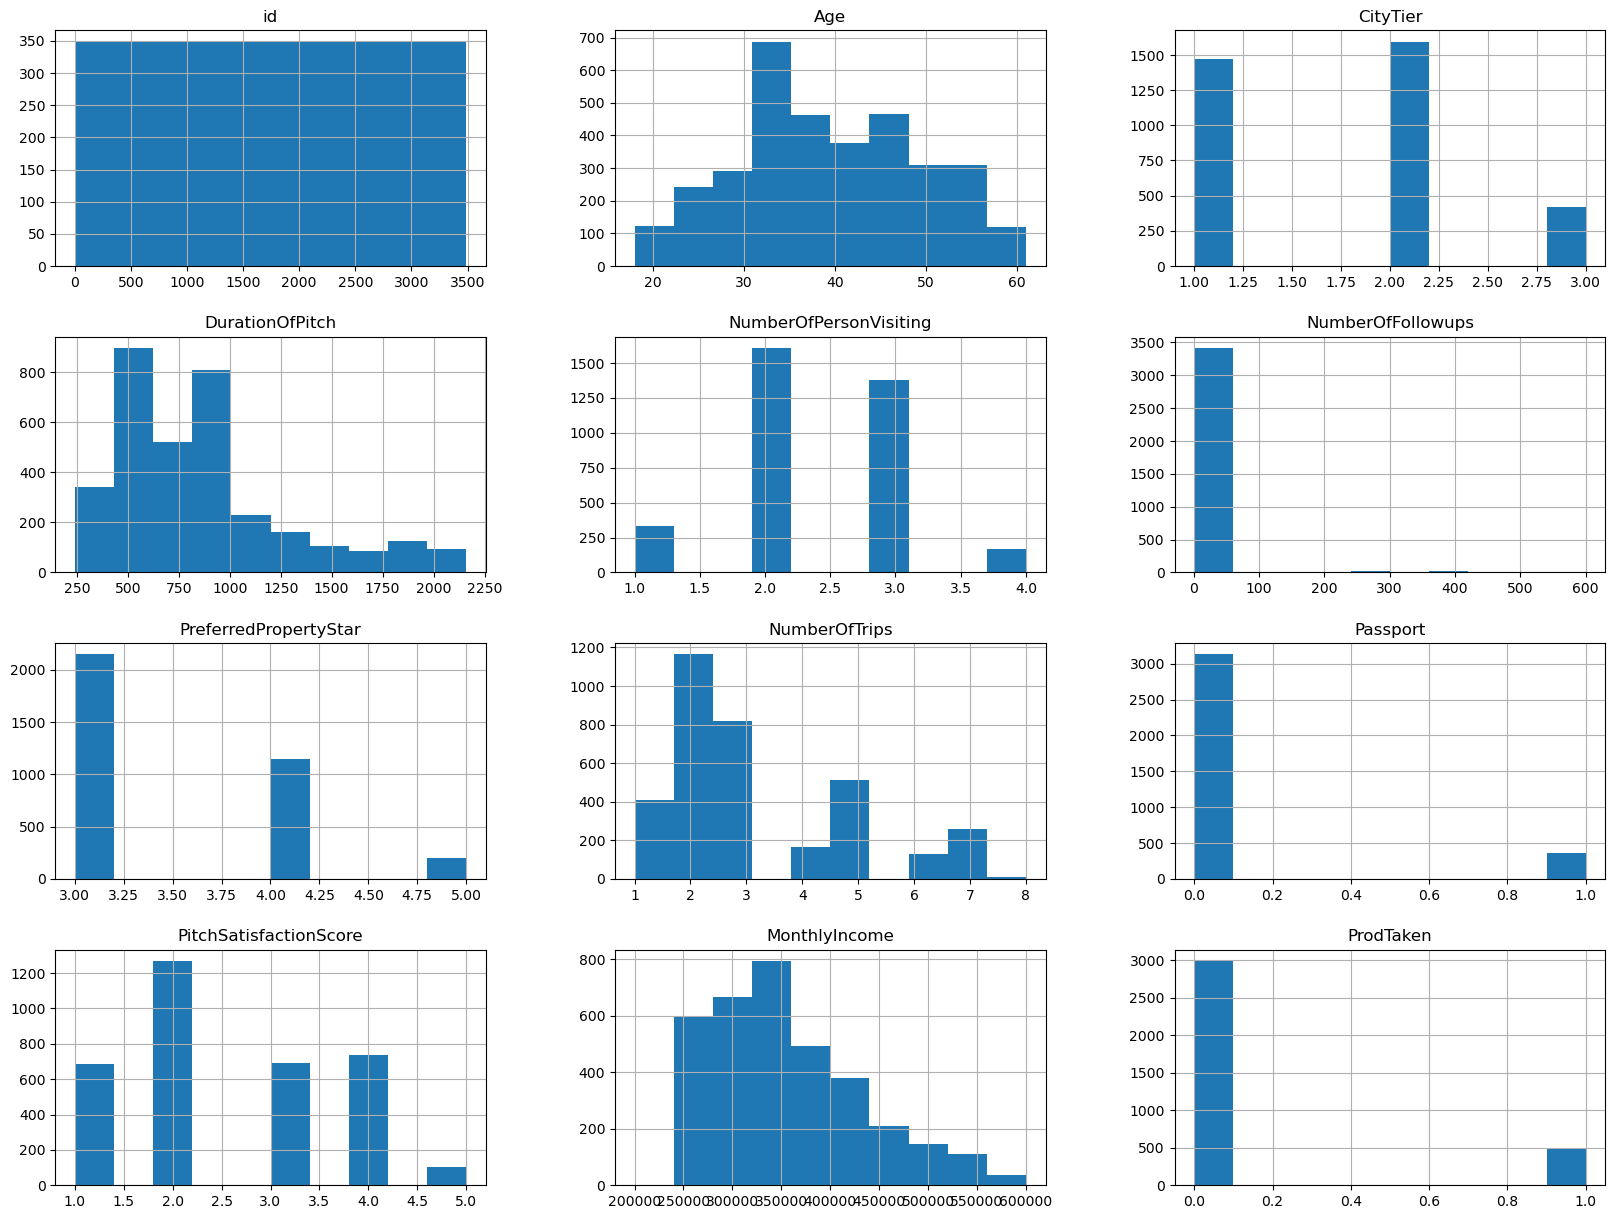

In [10]:
train_df.hist(figsize=(20, 15))

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'CityTier'}>],
       [<Axes: title={'center': 'DurationOfPitch'}>,
        <Axes: title={'center': 'NumberOfPersonVisiting'}>,
        <Axes: title={'center': 'NumberOfFollowups'}>],
       [<Axes: title={'center': 'PreferredPropertyStar'}>,
        <Axes: title={'center': 'NumberOfTrips'}>,
        <Axes: title={'center': 'Passport'}>],
       [<Axes: title={'center': 'PitchSatisfactionScore'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'ProdTaken'}>]], dtype=object)

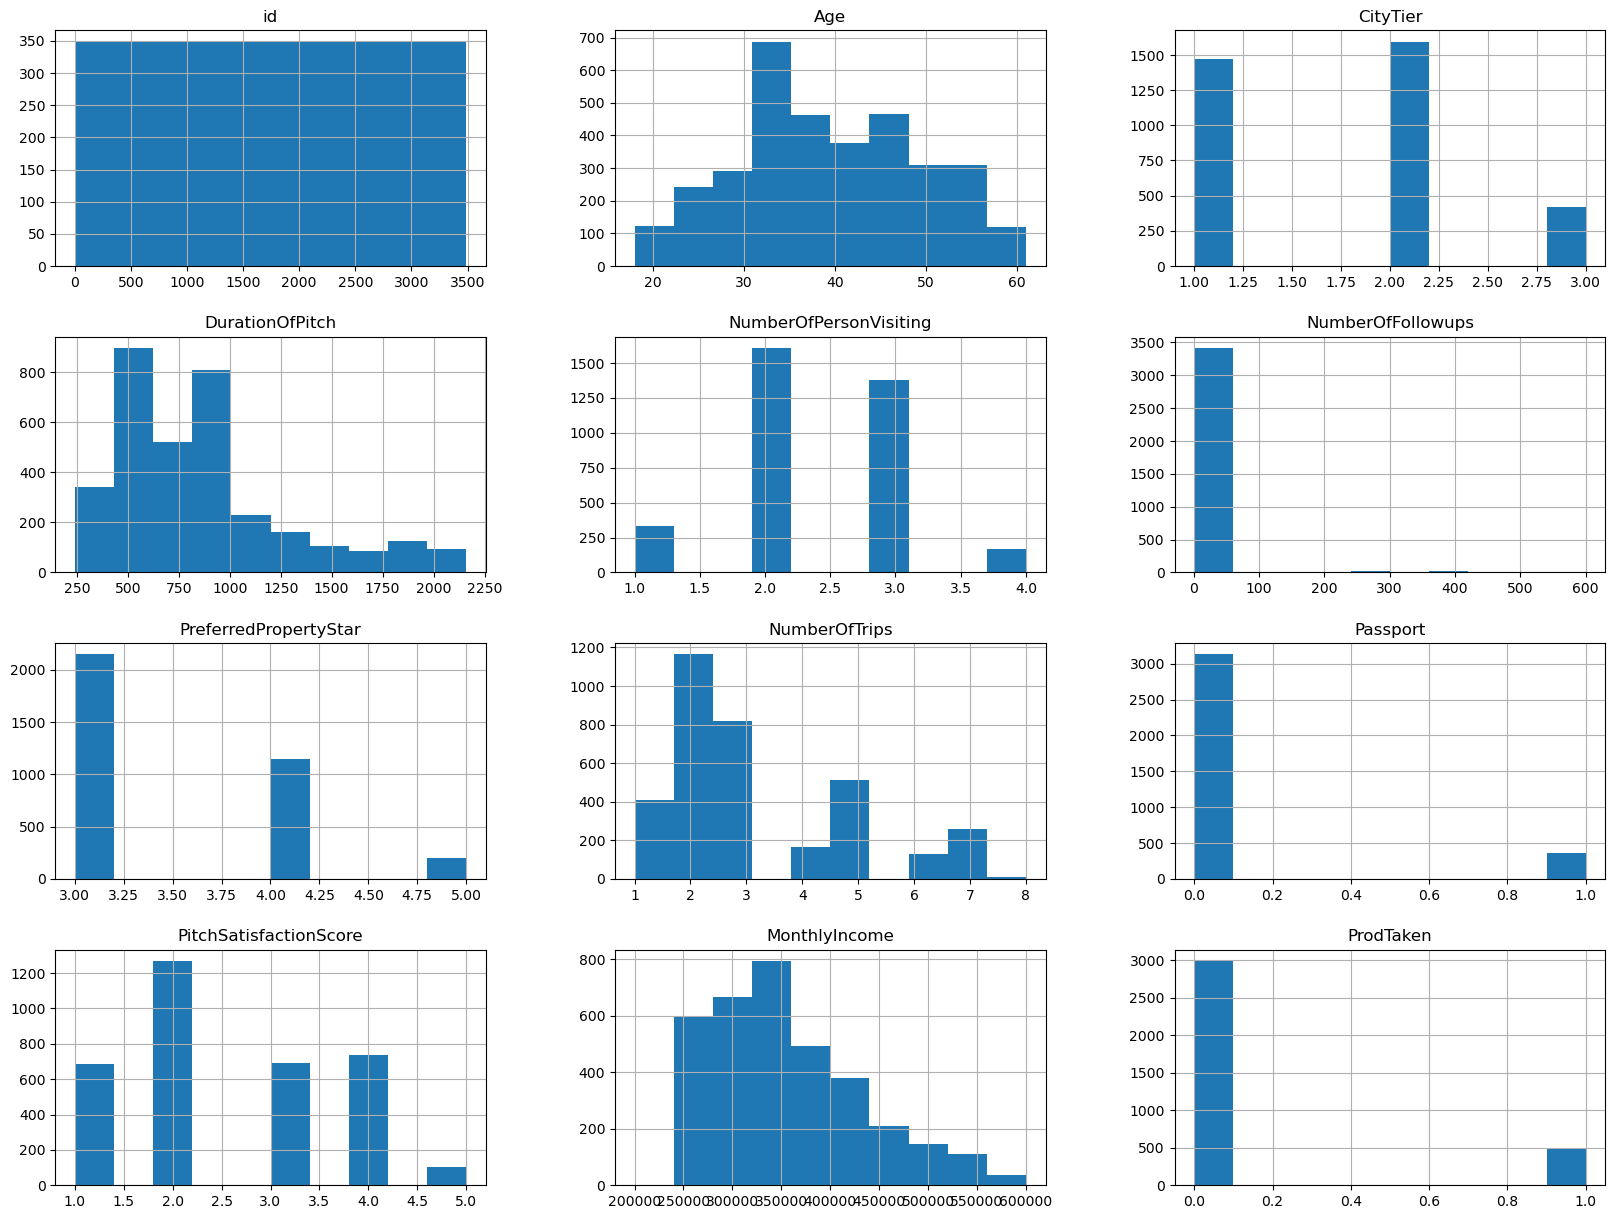

In [11]:
train_df.hist(figsize=(20, 15))

In [18]:
features = [
    "Age", 
    "CityTier", 
    "DurationOfPitch", 
    "NumberOfPersonVisiting", 
    "NumberOfFollowups", 
    "PreferredPropertyStar", 
    "NumberOfTrips", 
    "Passport", 
    "PitchSatisfactionScore", 
    "MonthlyIncome"
]

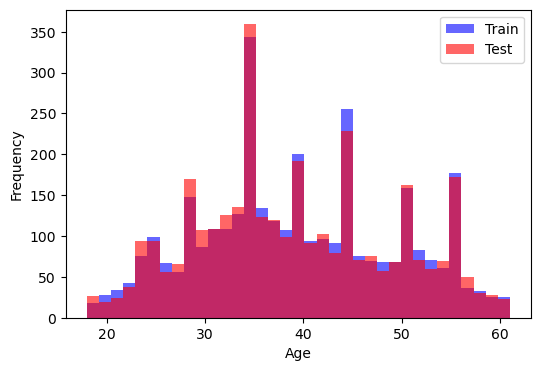

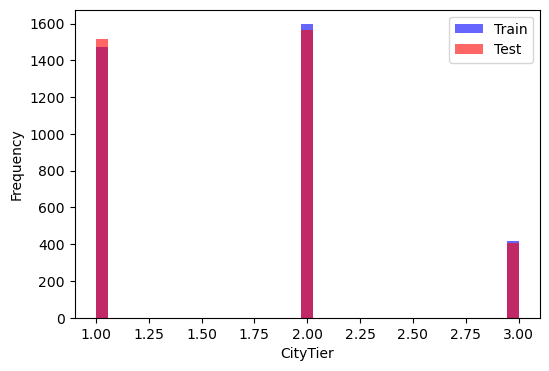

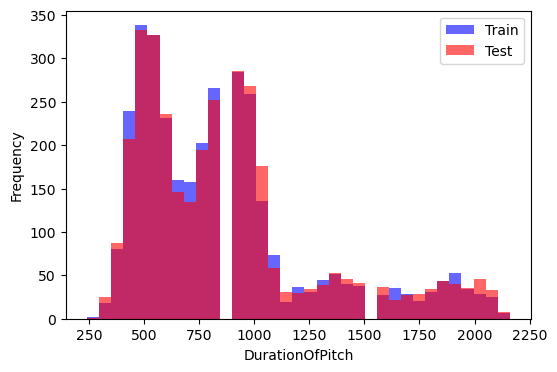

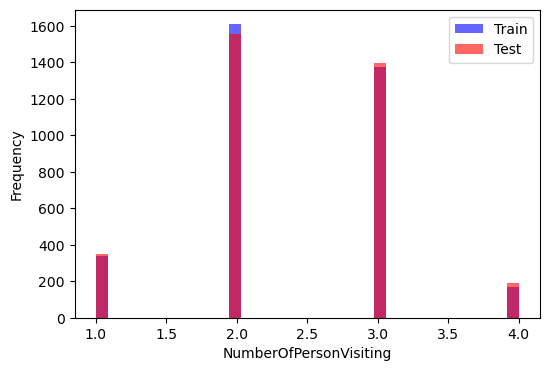

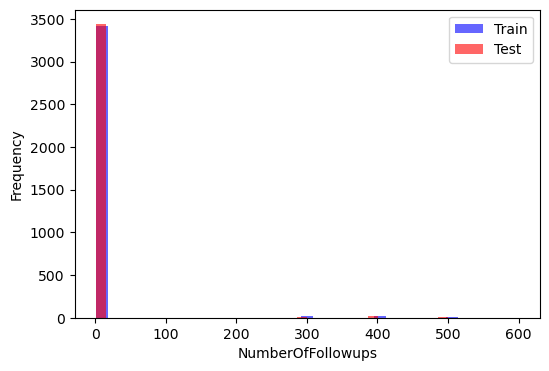

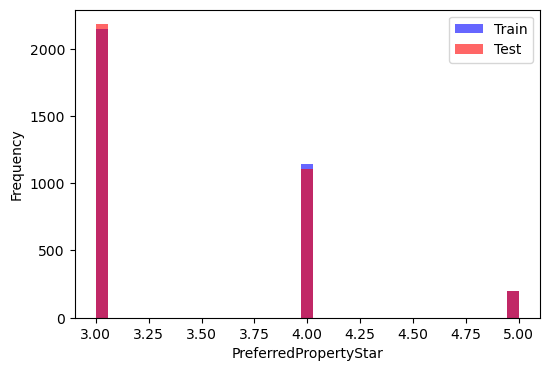

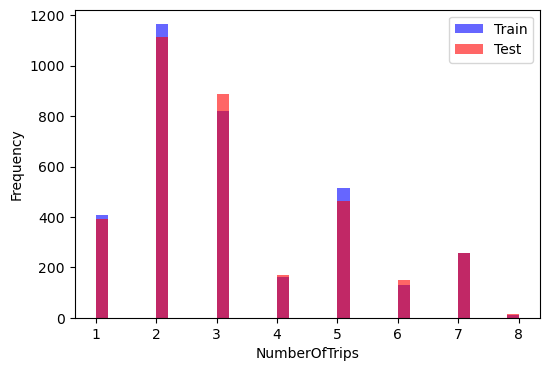

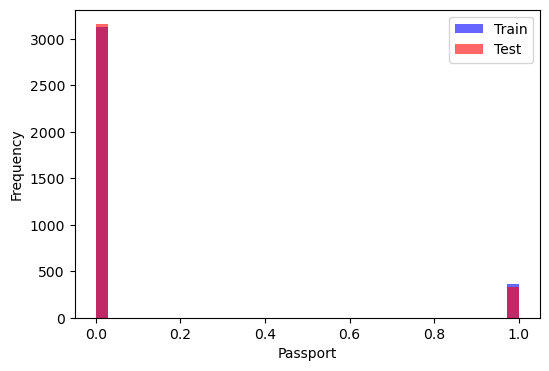

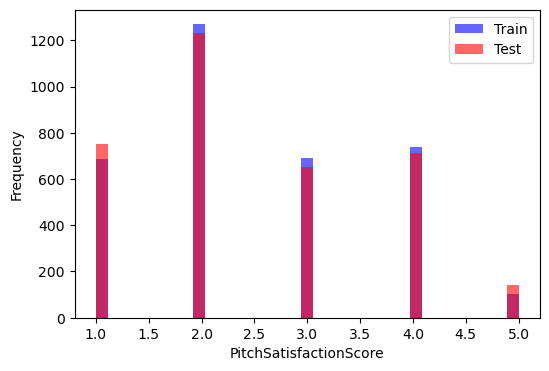

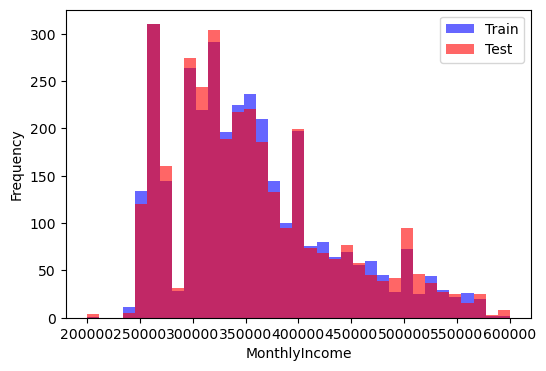

In [20]:
for feature in features:
    plt.figure(figsize=(6,4))
    train_df[feature].plot(bins=35, kind="hist", color="blue", label="Train", alpha=0.6)
    test_df[feature].plot(bins=35, kind="hist", color="red", label="Test", alpha=0.6)
    plt.legend()
    plt.xlabel(feature)

Train/Testの各データは同じ傾向

## 各カラムのターゲットフラグ別の傾向を確認

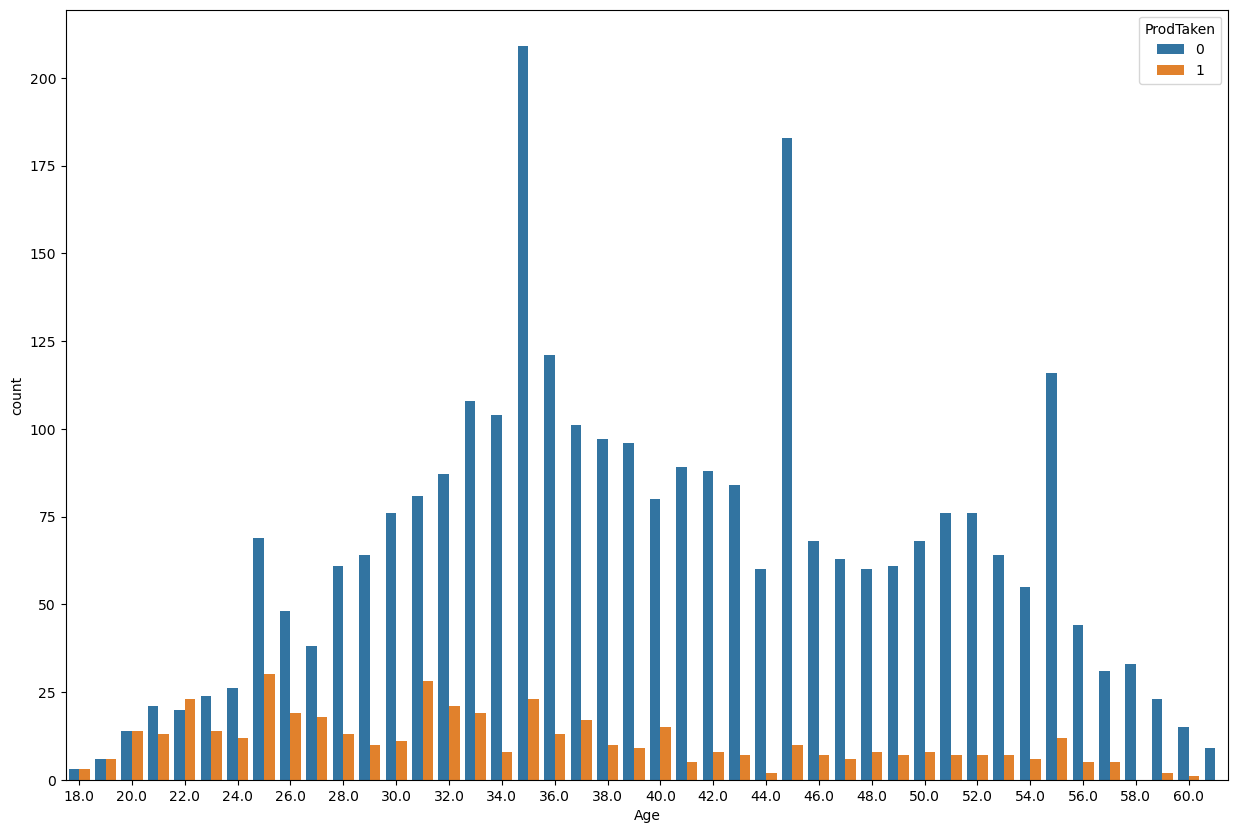

In [34]:
plt.figure(figsize=(15,10))
sns.countplot(x=features[0], hue="ProdTaken", data=train_df)
plt.gca().xaxis.set_major_locator(MultipleLocator(2))

ターゲットフラグが1のユーザは全体傾向に反して若年層が多い？

<Axes: xlabel='CityTier', ylabel='count'>

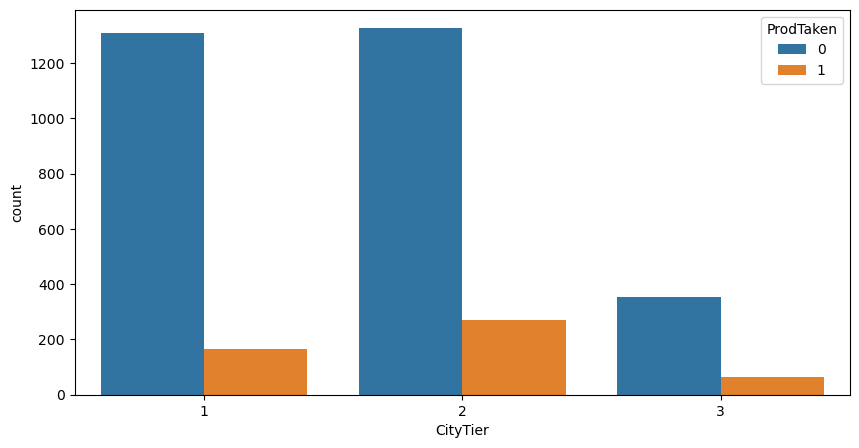

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(x=features[1], hue="ProdTaken", data=train_df)
# plt.gca().xaxis.set_major_locator(MultipleLocator(2))

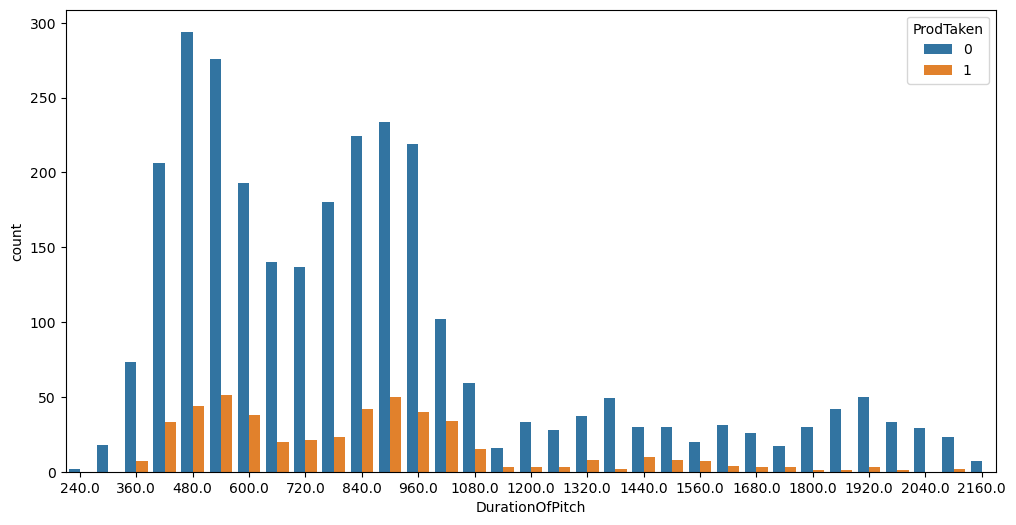

In [38]:
plt.figure(figsize=(12,6))
sns.countplot(x=features[2], hue="ProdTaken", data=train_df)
plt.gca().xaxis.set_major_locator(MultipleLocator(2))

<Axes: xlabel='NumberOfPersonVisiting', ylabel='count'>

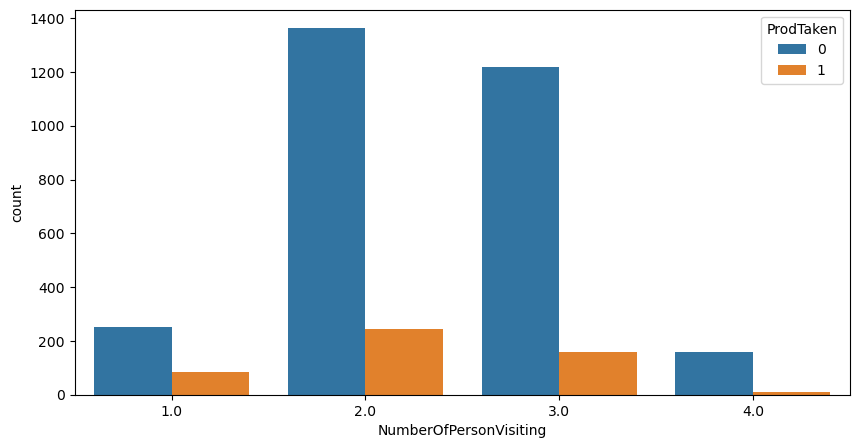

In [40]:
plt.figure(figsize=(10,5))
sns.countplot(x=features[3], hue="ProdTaken", data=train_df)
# plt.gca().xaxis.set_major_locator(MultipleLocator(2))

<Axes: xlabel='NumberOfFollowups', ylabel='count'>

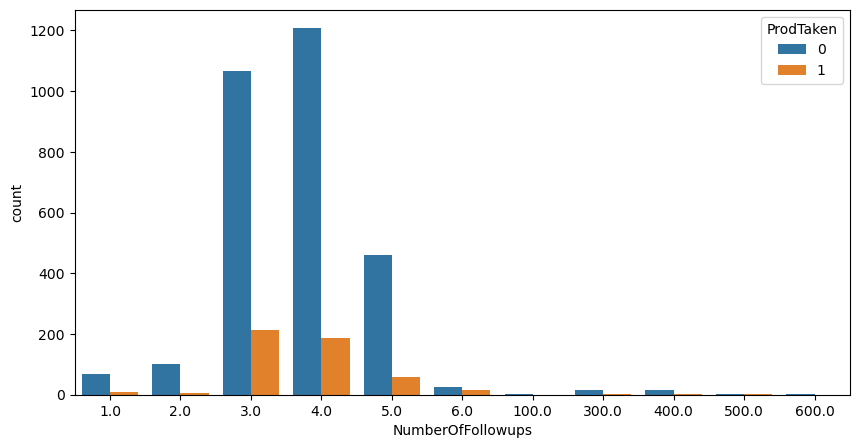

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(x=features[4], hue="ProdTaken", data=train_df)
# plt.gca().xaxis.set_major_locator(MultipleLocator(2))

<Axes: xlabel='PreferredPropertyStar', ylabel='count'>

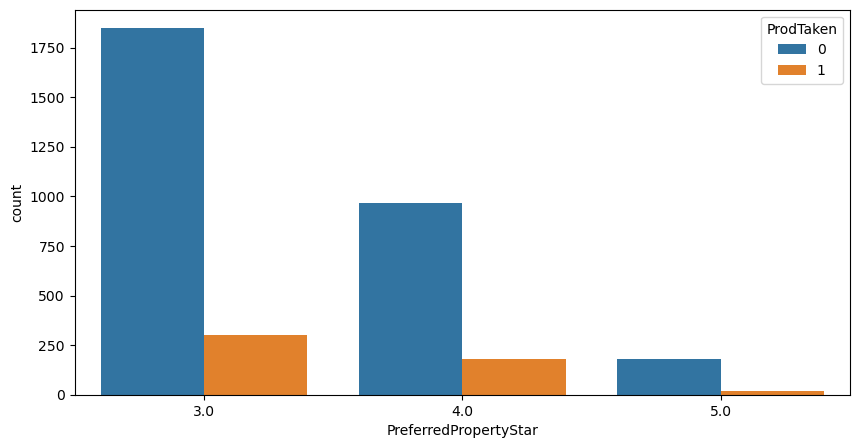

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(x=features[5], hue="ProdTaken", data=train_df)
# plt.gca().xaxis.set_major_locator(MultipleLocator(2))

<Axes: xlabel='NumberOfTrips', ylabel='count'>

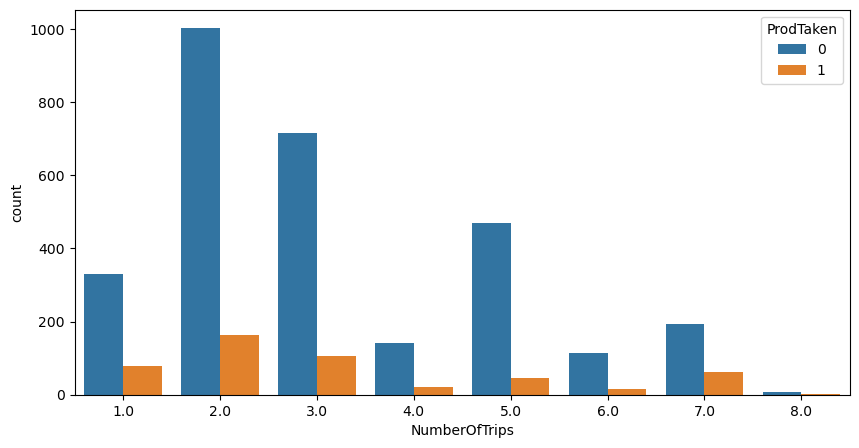

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(x=features[6], hue="ProdTaken", data=train_df)
# plt.gca().xaxis.set_major_locator(MultipleLocator(2))

<Axes: xlabel='Passport', ylabel='count'>

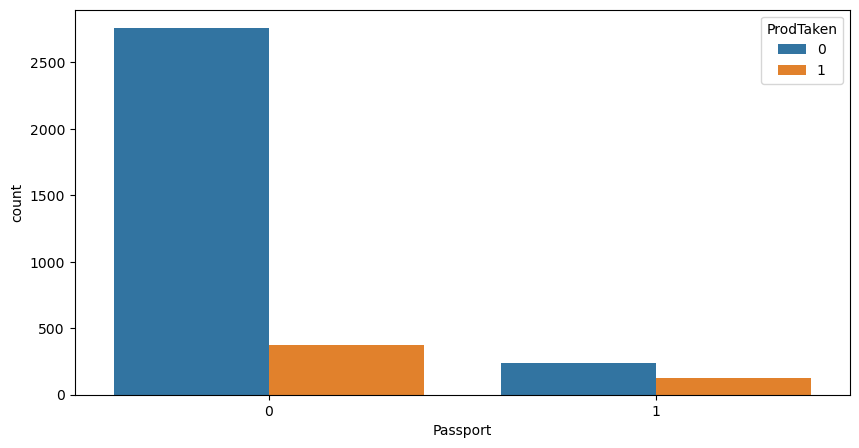

In [45]:
plt.figure(figsize=(10,5))
sns.countplot(x=features[7], hue="ProdTaken", data=train_df)
# plt.gca().xaxis.set_major_locator(MultipleLocator(2))

<Axes: xlabel='PitchSatisfactionScore', ylabel='count'>

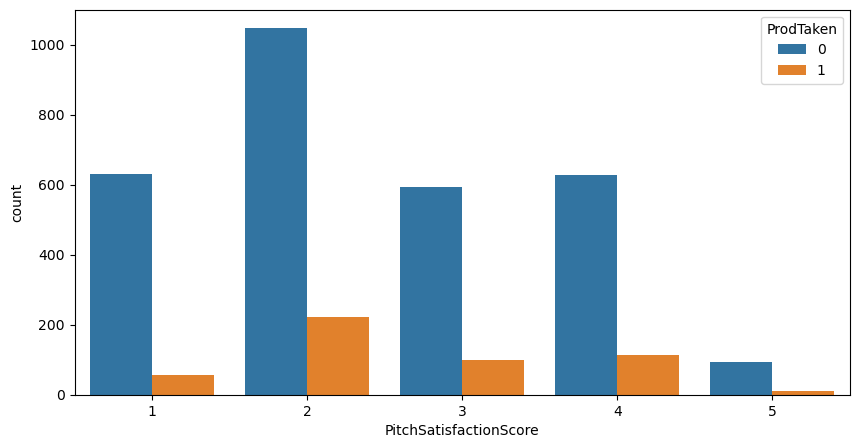

In [46]:
plt.figure(figsize=(10,5))
sns.countplot(x=features[8], hue="ProdTaken", data=train_df)
# plt.gca().xaxis.set_major_locator(MultipleLocator(2))

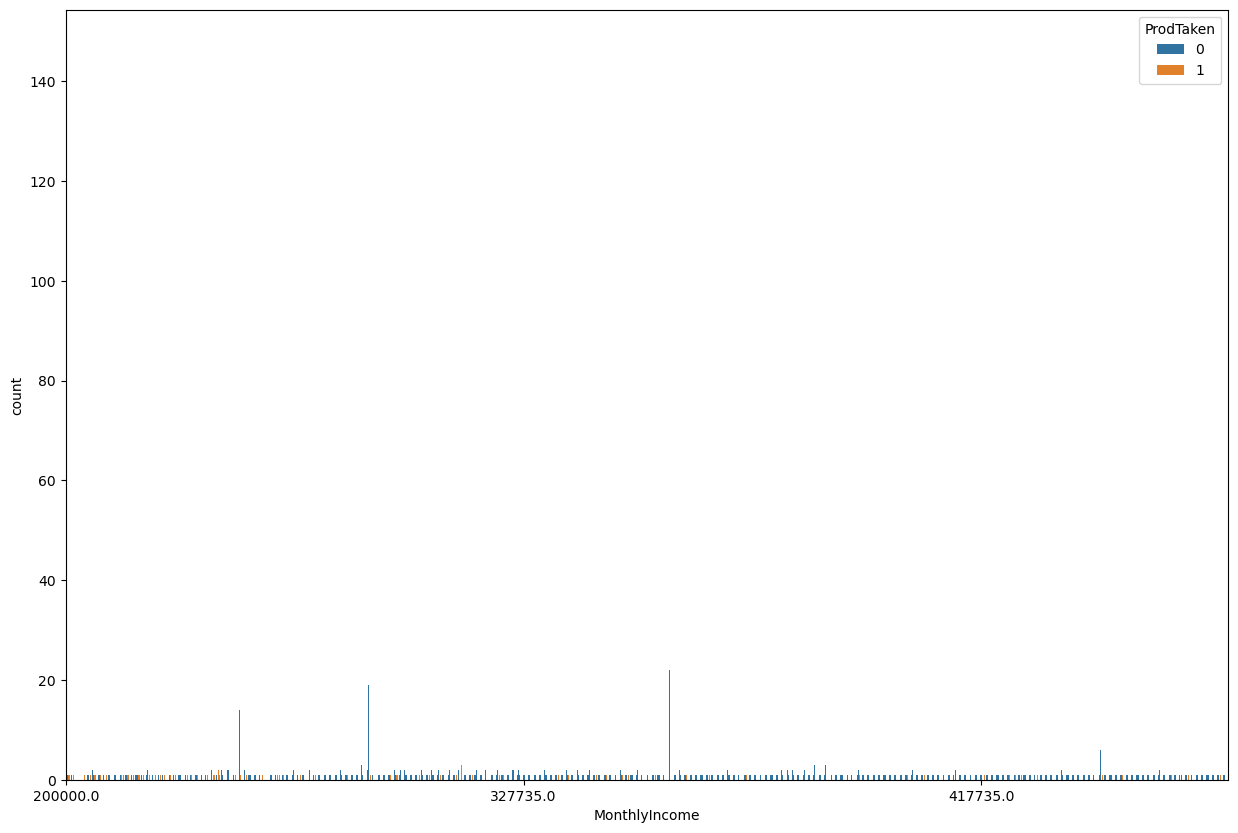

In [50]:
plt.figure(figsize=(15,10))
sns.countplot(x=features[9], hue="ProdTaken", data=train_df)
plt.gca().xaxis.set_major_locator(MultipleLocator(1000))

In [63]:
def ctgr_income(x):
    if x <= 200000:
        return "20万円以下"
    elif (x > 200000) & (x <= 250000):
        return "20~25万円"
    elif (x > 250000) & (x <= 300000):
        return "25~30万円"
    elif (x > 300000) & (x <= 350000):
        return "30~35万円"
    elif (x > 350000) & (x <= 400000):
        return "35~40万円"
    elif x > 400000:
        return "40万円以上"

In [64]:
train_df["MonthlyIncomeCtgr"] = train_df["MonthlyIncome"].apply(ctgr_income)

<Axes: xlabel='MonthlyIncomeCtgr', ylabel='count'>

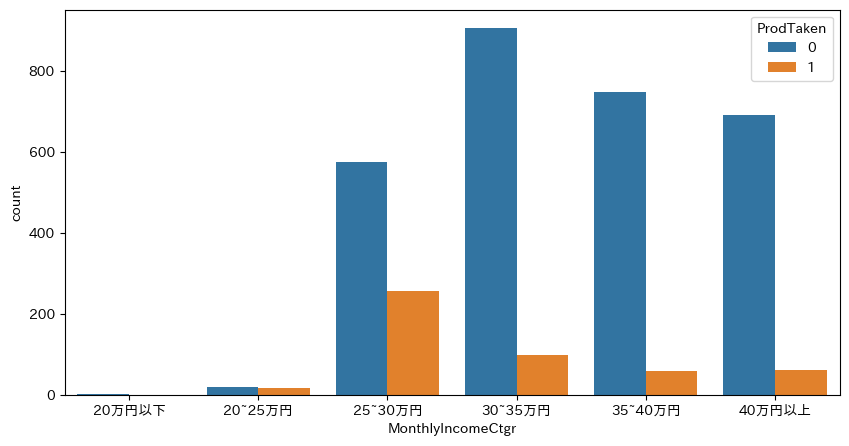

In [67]:
plt.figure(figsize=(10,5))
sns.countplot(x="MonthlyIncomeCtgr", hue="ProdTaken", data=train_df, order=["20万円以下", "20~25万円", "25~30万円", "30~35万円", "35~40万円", "40万円以上"])
# plt.gca().xaxis.set_major_locator(MultipleLocator(1000))

ターゲットフラグが1のユーザは低月収層が多い？  
若年層が多いことが影響？

<Axes: xlabel='Gender', ylabel='count'>

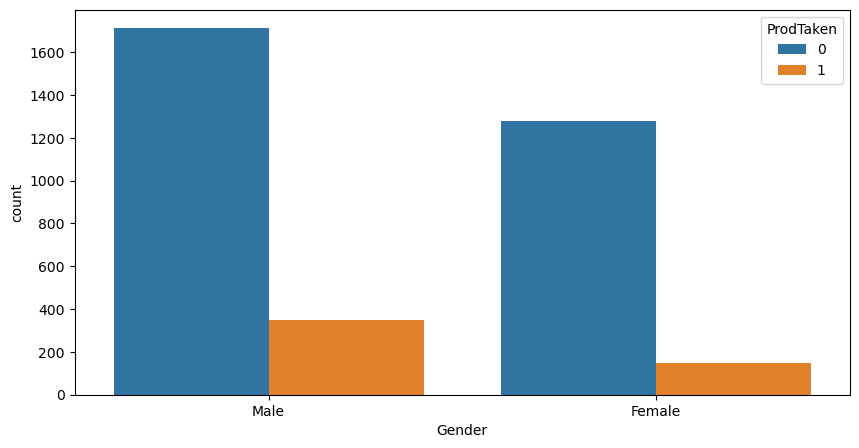

In [51]:
plt.figure(figsize=(10,5))
sns.countplot(x="Gender", hue="ProdTaken", data=train_df)
# plt.gca().xaxis.set_major_locator(MultipleLocator(1000))

<Axes: xlabel='Occupation', ylabel='count'>

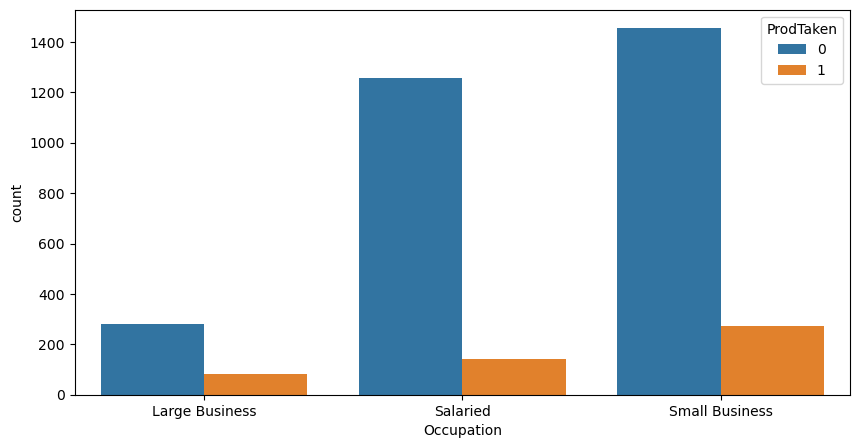

In [52]:
plt.figure(figsize=(10,5))
sns.countplot(x="Occupation", hue="ProdTaken", data=train_df)
# plt.gca().xaxis.set_major_locator(MultipleLocator(1000))

<Axes: xlabel='ProductPitched', ylabel='count'>

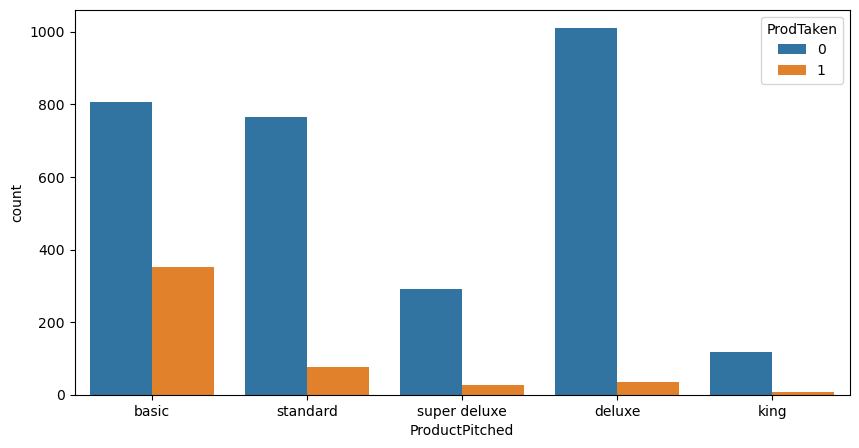

In [53]:
plt.figure(figsize=(10,5))
sns.countplot(x="ProductPitched", hue="ProdTaken", data=train_df)
# plt.gca().xaxis.set_major_locator(MultipleLocator(1000))

<Axes: xlabel='Designation', ylabel='count'>

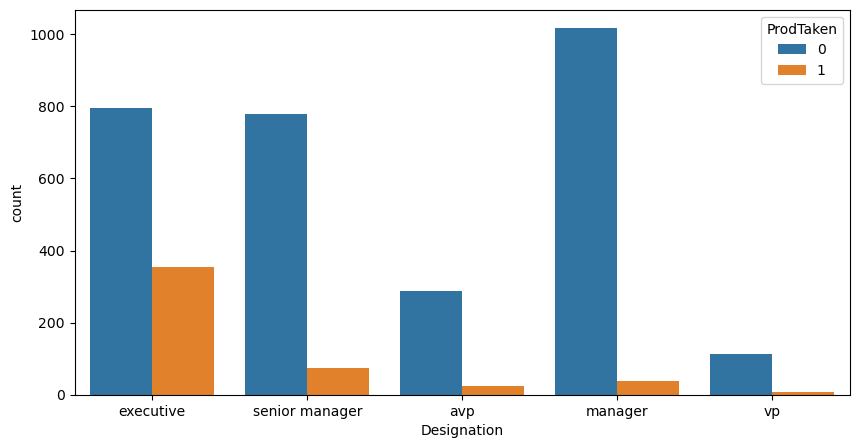

In [54]:
plt.figure(figsize=(10,5))
sns.countplot(x="Designation", hue="ProdTaken", data=train_df)
# plt.gca().xaxis.set_major_locator(MultipleLocator(1000))

<Axes: xlabel='customer_marriage', ylabel='count'>

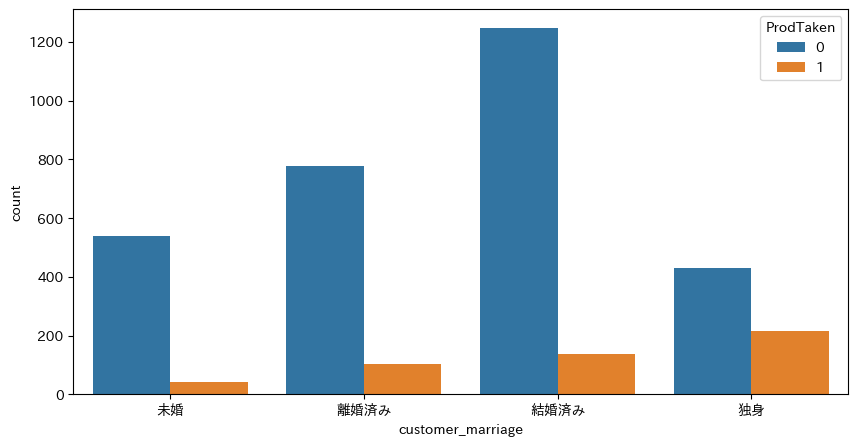

In [57]:
plt.figure(figsize=(10,5))
sns.countplot(x="customer_marriage", hue="ProdTaken", data=train_df)
# plt.gca().xaxis.set_major_locator(MultipleLocator(1000))

<Axes: xlabel='customer_car', ylabel='count'>

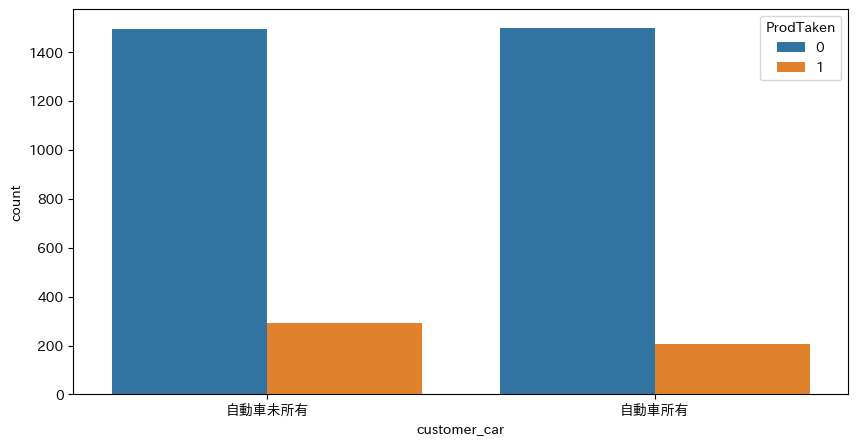

In [58]:
plt.figure(figsize=(10,5))
sns.countplot(x="customer_car", hue="ProdTaken", data=train_df)
# plt.gca().xaxis.set_major_locator(MultipleLocator(1000))

<Axes: xlabel='customer_child', ylabel='count'>

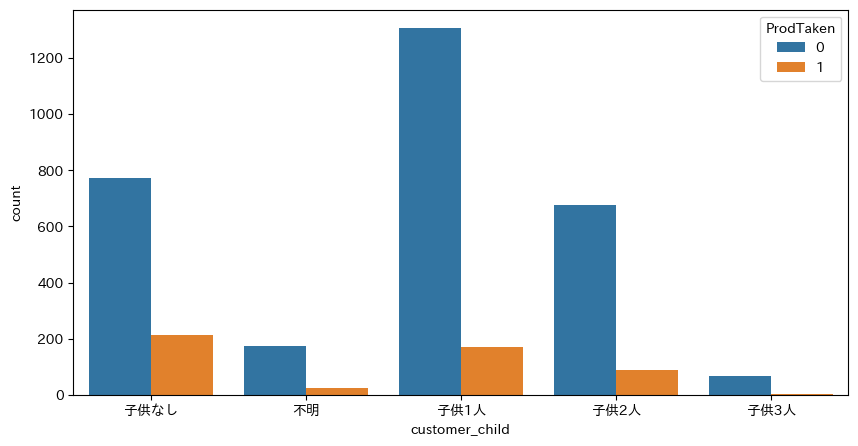

In [59]:
plt.figure(figsize=(10,5))
sns.countplot(x="customer_child", hue="ProdTaken", data=train_df)
# plt.gca().xaxis.set_major_locator(MultipleLocator(1000))

## 相関行列の確認

<Axes: >

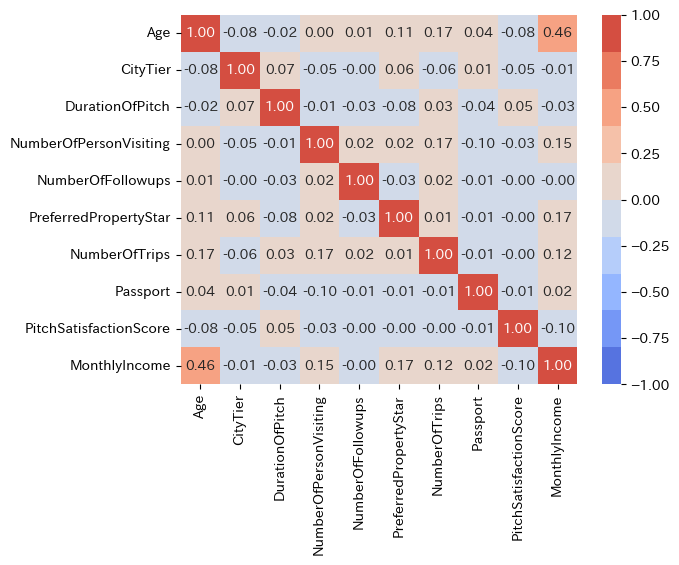

In [62]:
cor = train_df[features].corr()
sns.heatmap(cor, cmap= sns.color_palette('coolwarm', 10), annot=True,fmt='.2f', vmin = -1, vmax = 1)